#### Navid Al-Musabbir 1721853042
#### Md. Rubel Rana 1712661642

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
from sklearn.preprocessing import scale 
from sklearn import model_selection
from sklearn.model_selection import RepeatedKFold
from sklearn.model_selection import train_test_split
from sklearn.cross_decomposition import PLSRegression
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline
from sklearn.decomposition import PCA
from sklearn.metrics import mean_squared_error
from sklearn.metrics import mean_absolute_error as mae

### Dataset Import

In [2]:
data = 'dataset/Aman/aman.csv'

In [3]:
df = pd.read_csv(data)

In [4]:
df.head()

,District,Area,Year,Max_Temp,Min_Temp,Rainfall,Humidity,Wind,Cloud,Sunshine,ALT,Productions,PPH
0,2,634460,1969,28.400000,14.233333,10.666667,73.333333,0.533333,1.600000,8.866667,20,280905,0.442747
1,3,497290,1969,29.833330,15.666670,11.333330,74.666670,0.933333,2.533333,8.566667,6,319075,0.641628
2,4,976420,1969,31.300000,17.400000,15.666667,78.333333,0.200000,0.633333,7.241414,10,508305,0.520580
3,5,765390,1969,29.266667,14.600000,6.000000,71.666667,0.500000,1.866667,8.900000,9,312720,0.408576
4,6,888530,1969,28.433333,13.400000,32.666667,76.000000,0.133333,0.666667,6.554667,37,407065,0.458133


In [5]:
df.tail()

,District,Area,Year,Max_Temp,Min_Temp,Rainfall,Humidity,Wind,Cloud,Sunshine,ALT,Productions,PPH
718,14,117370,2013,30.65,14.45,0.0,79.0,2.05,0.65,6.35,20,130571,1.112473
719,15,24542,2013,31.20,16.15,0.0,82.0,1.10,1.45,7.70,63,29846,1.216119
720,16,384166,2013,29.55,15.00,0.0,79.0,1.90,1.05,5.65,34,470034,1.223518
721,17,351171,2013,31.60,16.00,0.0,75.0,2.30,1.65,7.45,35,393509,1.120562
722,18,318362,2013,31.65,14.70,1.0,79.5,1.50,0.70,6.55,10,285629,0.897183


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 723 entries, 0 to 722
Data columns (total 13 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   District     723 non-null    int64  
 1   Area         723 non-null    int64  
 2   Year         723 non-null    int64  
 3   Max_Temp     723 non-null    float64
 4   Min_Temp     723 non-null    float64
 5   Rainfall     723 non-null    float64
 6   Humidity     723 non-null    float64
 7   Wind         723 non-null    float64
 8   Cloud        723 non-null    float64
 9   Sunshine     723 non-null    float64
 10  ALT          723 non-null    int64  
 11  Productions  723 non-null    int64  
 12  PPH          723 non-null    float64
dtypes: float64(8), int64(5)
memory usage: 73.6 KB


In [7]:
df= df[df['Area'] != 0]
df= df[df['Productions'] != 0]

#### Removing Outliers

In [8]:
z=np.abs(stats.zscore(df))

In [9]:
np.where(z > 4)

(array([ 54,  60,  95, 108, 149, 213, 248, 402, 402, 432, 432, 451, 640,
        657, 662, 674, 691, 708], dtype=int64),
 array([ 5,  5,  5,  3, 12,  8,  5,  5, 12,  8,  9,  5,  7,  7,  7,  7,  7,
         7], dtype=int64))

In [10]:
Q1 = df.quantile(0.25)
Q3 = df.quantile(0.75)
IQR = Q3 - Q1

In [11]:
(df < (Q1 - 1.5 * IQR)) | (df < (Q3 - 1.5 * IQR))

,District,Area,Year,Max_Temp,Min_Temp,Rainfall,Humidity,Wind,Cloud,Sunshine,ALT,Productions,PPH
0,False,False,True,True,False,False,False,False,False,False,False,False,False
1,False,False,True,False,False,False,False,False,False,False,False,False,False
2,False,False,True,False,False,False,False,False,True,False,False,False,False
3,False,False,True,False,False,False,False,False,False,False,False,False,False
4,False,False,True,True,False,False,False,False,True,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...
718,False,True,False,False,False,False,False,False,True,False,False,False,False
719,False,True,False,False,False,False,False,False,False,False,False,True,False
720,False,False,False,False,False,False,False,False,False,True,False,False,False
721,False,False,False,False,False,False,False,False,False,False,False,False,False


In [12]:
df = df[(z < 4).all(axis=1)]

In [13]:
#defining response and predictor variables
X = df[['District', 'Area', 'Year', 'Max_Temp', 'Min_Temp', 'Rainfall',
       'Humidity', 'Wind', 'Cloud', 'Sunshine', 'ALT']]
y = df[['PPH']]

### Checking number of principal components and MSE

In [14]:
pca = PCA()
X_reduced = pca.fit_transform(scale(X))

In [15]:
#defining cross-validation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)

regr = LinearRegression()
mse = []

In [16]:
for i in np.arange(1, 12):
    score = -1*model_selection.cross_val_score(regr,
               X_reduced[:,:i], y, cv=cv, scoring='neg_mean_squared_error').mean()
    mse.append(score)

Text(0.5, 1.0, 'Production')

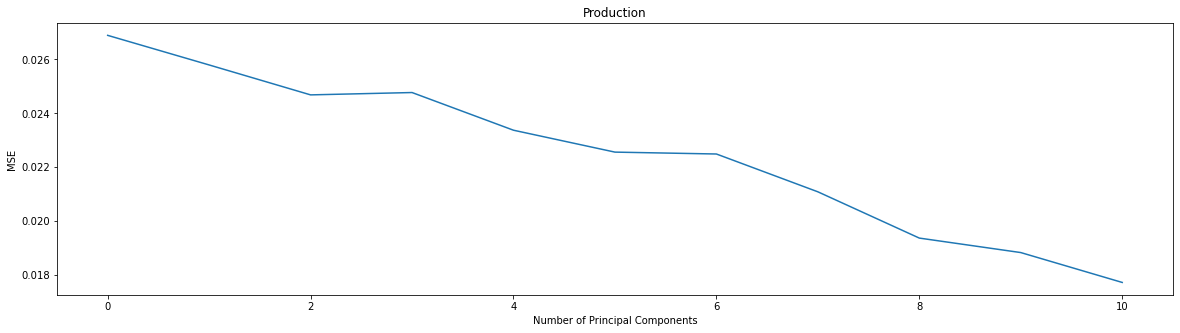

In [17]:
plt.figure(figsize=(20, 5))
plt.plot(mse)
plt.xlabel('Number of Principal Components')
plt.ylabel('MSE')
plt.title('Production')

In [18]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)

array([ 20.91,  38.03,  51.3 ,  61.73,  70.78,  77.94,  84.02,  89.38,
        93.99,  97.47, 100.01])

In [19]:
#spliting the dataset
rng = np.random.RandomState(0)
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.3,random_state=rng)

In [20]:
#spliting the validation data
#rng = np.random.RandomState(0)
#X_train, X_rem, y_train, y_rem = train_test_split(X,y,test_size=0.3,random_state=rng)

In [21]:
#X_train, X_test, y_valid, y_test = train_test_split(X_rem, y_rem, test_size=0.3,random_state=rng)

In [22]:
#scale the training and testing data
X_reduced_train = pca.fit_transform(scale(X_train))
X_reduced_test = pca.transform(scale(X_test))[:,:1]

In [23]:
regr = LinearRegression()
regr.fit(X_reduced_train[:,:1], y_train)

LinearRegression()

In [24]:
pred = regr.predict(X_reduced_test)
print("MSE =", np.sqrt(mean_squared_error(y_test, pred)))

MSE = 0.16441543816572715


In [25]:
print("MAE =", mae(y_test, pred))

MAE = 0.13147453601242926


### PCR RMSE, R Squared, MAE Values using 10th component

In [26]:
pcr = make_pipeline(StandardScaler(), PCA(n_components=10), LinearRegression())
pcr.fit(X_train, y_train)
pca = pcr.named_steps['pca']

In [27]:
#calculating RMSE
pcr.fit(scale(X_train), y_train)

print("RMSE =", np.sqrt(mean_squared_error(y_test, pcr.predict(scale(X_test)))))

RMSE = 0.14089731690338225


In [28]:
#calculating R2
pcr.fit(X_train, y_train)

print("R2 =", pcr.score(X_test, y_test))

R2 = 0.6061696319450618


In [29]:
#calculating MAE
pcr.fit(scale(X_train), y_train)

print("MAE =", mae(y_test, pcr.predict(scale(X_test))))

MAE = 0.10357999134140528


### Plot

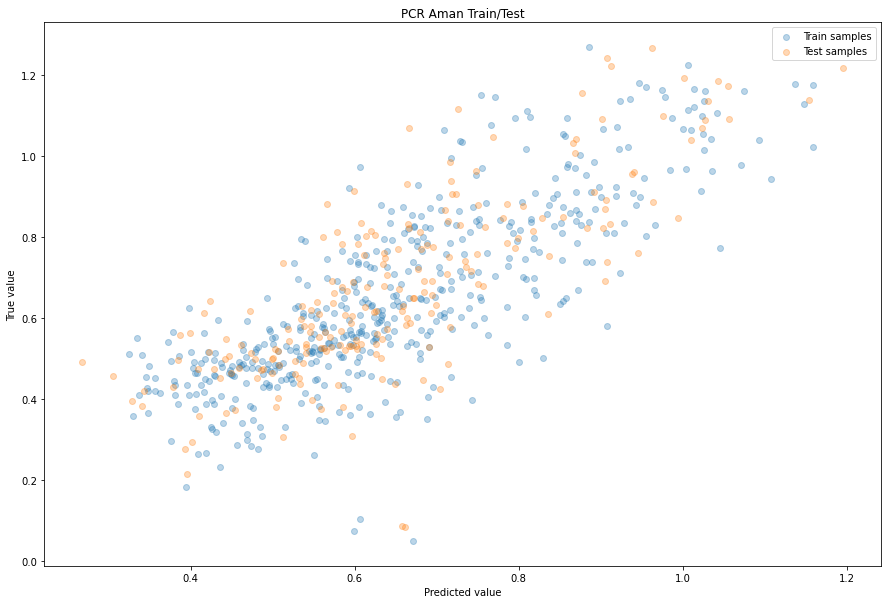

In [30]:
plt.figure(figsize=(15,10))
plt.scatter(pcr.predict(scale(X_train)), y_train, alpha=.3, label="Train samples")
plt.scatter(pcr.predict(scale(X_test)), y_test, alpha=.3, label="Test samples")
plt.title('PCR Aman Train/Test')
plt.xlabel("Predicted value")
plt.ylabel("True value")
plt.legend()
plt.savefig("figures/pcr_aman.png")
plt.show()

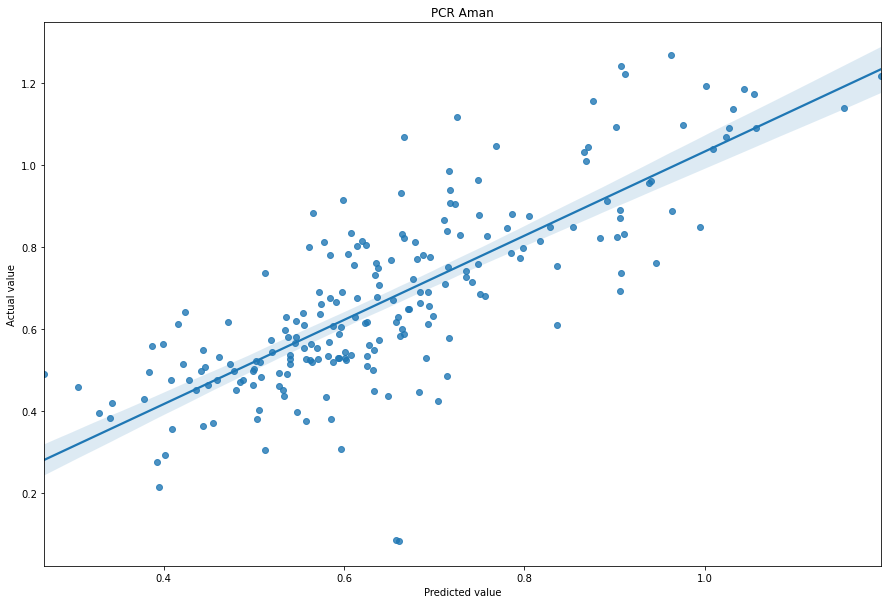

In [31]:
plt.figure(figsize=(15,10))
sns.regplot(x=pcr.predict(scale(X_test)), y = y_test, data = df)
plt.title('PCR Aman')
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.savefig("figures/pcr_aman_2.png")

### Checking number of principal components and MSE

In [32]:
#defining cross-validation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
mse = []
n = len(X)

In [33]:
for i in np.arange(1, 12):
    pls = PLSRegression(n_components=i)
    score = -1*model_selection.cross_val_score(pls, scale(X), y, cv=cv,
               scoring='neg_mean_squared_error').mean()
    mse.append(score)

Text(0.5, 1.0, 'Production')

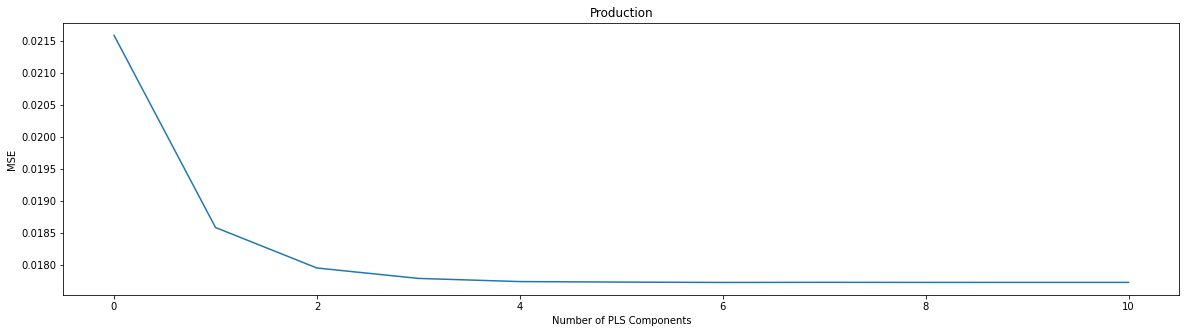

In [34]:
plt.figure(figsize=(20, 5))
plt.plot(mse)
plt.xlabel('Number of PLS Components')
plt.ylabel('MSE')
plt.title('Production')

### PLSR RMSE, R Squared, MAE Values Using 3rd Component

In [35]:
#calculating RMSE
pls = PLSRegression(n_components=3)
pls.fit(scale(X_train), y_train)

print("RMSE =", np.sqrt(mean_squared_error(y_test, pls.predict(scale(X_test)))))

RMSE = 0.13583967008838294


In [36]:
#calculating R2
pls = PLSRegression(n_components=3)
pls.fit((X_train), y_train)

print("R2 =", pls.score(X_test, y_test))

R2 = 0.6340232671903459


In [37]:
#calculating MAE
pls = PLSRegression(n_components=3)
pls.fit(scale(X_train), y_train)

print("MAE =", mae(y_test, pls.predict(scale(X_test))))

MAE = 0.10101193792056348


### Plot

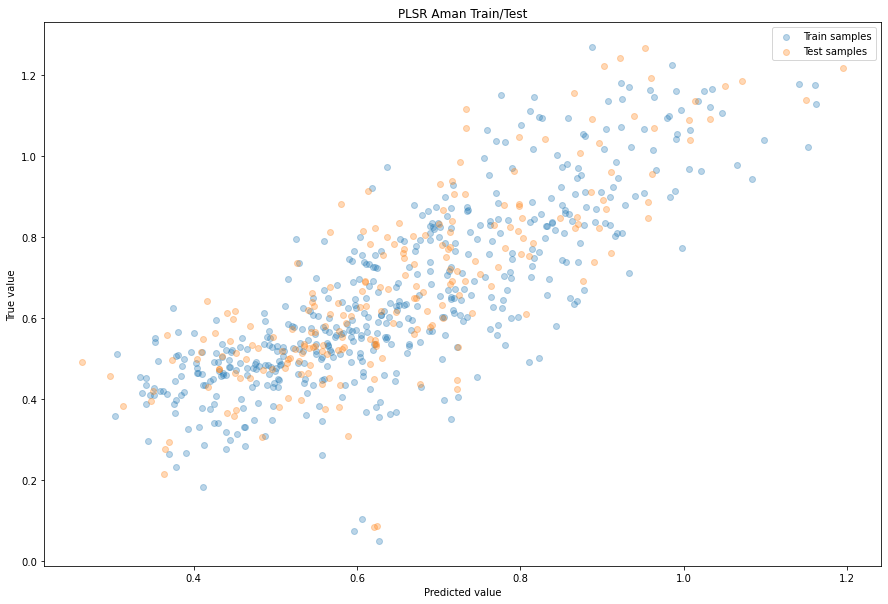

In [38]:
pls = PLSRegression(n_components=3)
pls.fit(X_train, y_train)

plt.figure(figsize=(15,10)) 
plt.scatter(pls.predict(X_train), y_train, alpha=.3, label="Train samples") 
plt.scatter(pls.predict(X_test), y_test, alpha=.3, label="Test samples")  
plt.title('PLSR Aman Train/Test')
plt.xlabel("Predicted value") 
plt.ylabel("True value") 
plt.legend()
plt.savefig("figures/plsr_aman.png")
plt.show()

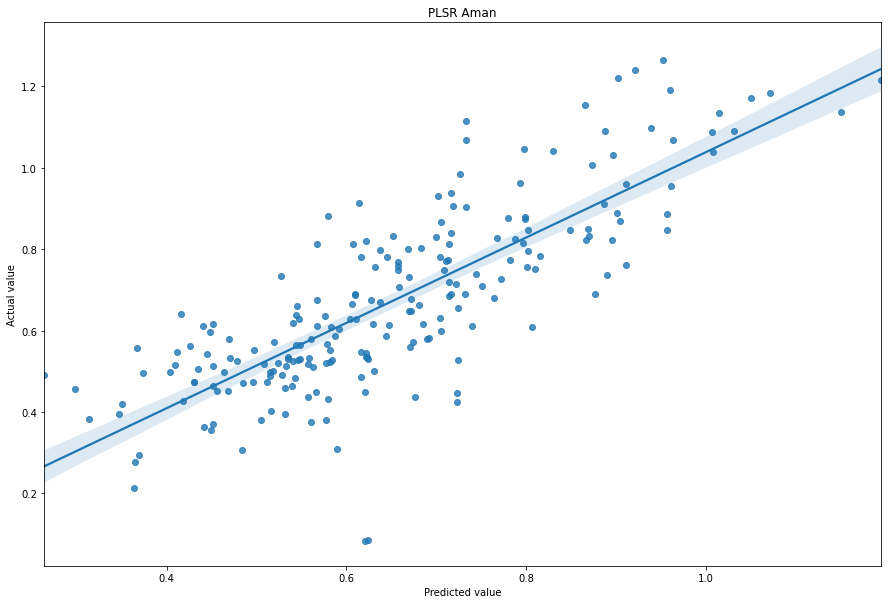

In [39]:
plt.figure(figsize=(15,10))
sns.regplot(x=pls.predict(X_test), y = y_test, data = df)
plt.title('PLSR Aman')
plt.xlabel("Predicted value")
plt.ylabel("Actual value")
plt.savefig("figures/plsr_aman_2.png")